# OpenCV-Python

### （1）颜色转换

颜色空间的转换，颜色转换函数是cv2.cvtColor()。

常见色彩空间包括GRAY、XYZ、YCrCb、HSV、HLS、CIEL*a*b*、CIEL*u*v*、Bayer。
人眼视觉系统（HVS, Human Visual System）对颜色的敏感度要低于对亮度的敏感度。
在传统的RGB色彩空间内，RGB三原色具有相同的重要性，但是忽略了亮度信息。
在YCrCb色彩空间中，Y代表光源的亮度，Cr表示红色分量信息，Cb表示蓝色分量信息。
HSV（色调hue，饱和度saturation，亮度value）是面向视觉感知的颜色模型。
色调是指光的颜色，饱和度是指色彩的深浅程度。
H（hue）、L（lightness，明度）、S（saturation）
CIEL*a*b*中的L*表示亮度，a*表示从红色到绿色的范围，b*表示从黄色到蓝色的范围。
CIEL*u*v*色彩空间同CIEL*a*b*色彩空间一样，都是均匀的颜色模型。
Bayer色彩空间（Bayer模型）被广泛地应用在CCD和CMOS相机中。

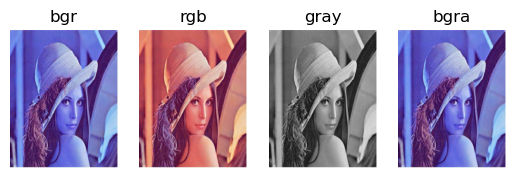

In [18]:
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread("lena.jpg")  # OpenCV默认原始图像是BGR格式
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)  # BGR转gray
rgb_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)  # BGR转RGB
bgra_img = cv.cvtColor(img, cv.COLOR_BGR2BGRA)  # BGR转换为BGRA，A是透明度。
b, g, r, a = cv.split(bgra_img)

# 以子图的方式显示图像
plt.subplot(1, 4, 1), plt.title("bgr"), plt.axis("off")
plt.imshow(img)
plt.subplot(1, 4, 2), plt.title("rgb"), plt.axis("off")
plt.imshow(rgb_img)
plt.subplot(1, 4, 3), plt.title("gray"), plt.axis("off")
plt.imshow(gray_img, cmap="gray")  # cmap参数表示以灰度图显示
plt.subplot(1, 4, 4), plt.title("bgra"), plt.axis("off")
plt.imshow(bgra_img)
plt.show()

### （2）位平面分解、图像加密解密和数字水印。

#### 2.1 位平面分解

位平面分解原理介绍：

8个比特位的灰度图像按照比特位可分为8个位平面，每个平面是二进制图像。
在8位灰度图中，每一个像素使用8位二进制值来表示，其值的范围在[0,255]之间。
位平面按低位到高位分别为2的0次方、2的1次方、2的平方，直到2的7次方。
8位灰度图由这8个位平面加权组合，权重从低到高。
将图像的像素值表示为8位二进制，取对应位置的二进制值组成对应的位平面
比如灰度图像像素值是2和3，其对应的8位二进制就是00000010和00000011,
8个（0~7）位平面就分别是01、11、00、00、00、00、00、00。
将彩色图像每个通道相同的位平面组合可得到新的彩色图像，比如组合B,G,R的第三位平面。

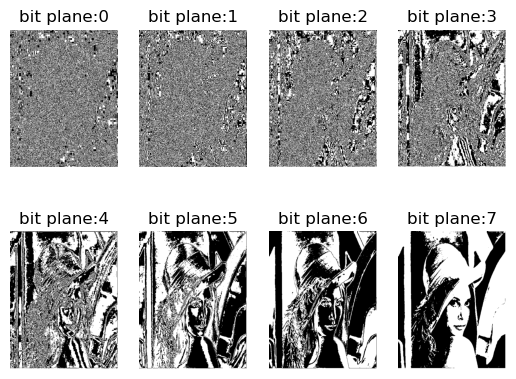

In [37]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

gray = cv.imread("lena.jpg", 0)  # 读取灰度图
row, col = gray.shape  # 获取灰度图的行、列大小，用来生成按位与操作的模板
x = np.zeros((row, col, 8), dtype=np.uint8)  # 生成8通道的0矩阵

for i in range(8):
    x[:, :, i] = 2**i  # 将0矩阵的8个通道变为1，2,3,4到7,8，

# r矩阵用来储存按位与操作之后的结果。
r = np.zeros((row, col, 8), dtype=np.uint8)

for i in range(8):
    # 灰度图gray分别和x的8个通道执行按位与操作，并赋值给r。
    r[:, :, i] = cv.bitwise_and(gray, x[:, :, i])

    # 将大于0的像素值变为255，方便查看，不然像素值过低视觉效果是一团黑。
    mask = r[:, :, i] > 0
    r[mask] = 255

    plt.subplot(2, 4, i + 1), plt.title("bit plane:" + str(i)), plt.axis("off")
    # 设置cmap="gray"，以灰度图显示二值图像，不然图像是彩色。
    plt.imshow(r[:, :, i], cmap="gray")

#### 2.2 图像加密解密

图像加密解密原理：

通过按位异或运算可以实现图像的加密和解密。
通过对原始图像与密钥图像进行按位异或，可以实现加密；
将加密后的图像与密钥图像再次进行按位异或，可以实现解密。

位运算是指针对二进制位进行的运算，利用位运算即可实现对像素点的加密。
在图像处理中，需要处理的像素点的值通常为灰度值，其范围通常为[0,255]。
例如，某个像素点的值为2（明文,表示为二进制是10），使用1（二进制是01）作为密钥对其进行加密，让这两个数的二进制值进行按位异或运算，即完成加密，得到一个密文3（二进制是11）。
当需要解密时，将密文3与密钥1进行按位异或运算，即可得到原始像素点值2（明文）。

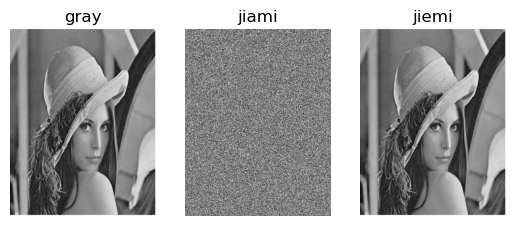

In [34]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# 灰度图
gray = cv.imread("lena.jpg", 0)
row, col = gray.shape
# 密钥
key = np.random.randint(0, 256, size=(row, col), dtype=np.uint8)
# 对灰度图加密，按位异或。
jiami_img = cv.bitwise_xor(gray, key)
# 将加密图解密，按位异或。
jiemi_img = cv.bitwise_xor(jiami_img, key)

plt.subplot(1, 3, 1), plt.title("gray"), plt.axis("off")
plt.imshow(gray, cmap="gray")
plt.subplot(1, 3, 2), plt.title("jiami"), plt.axis("off")
plt.imshow(jiami_img, cmap="gray")
plt.subplot(1, 3, 3), plt.title("jiemi"), plt.axis("off")
plt.imshow(jiemi_img, cmap="gray")
plt.show()

#### 2.3 数字水印

数字水印原理：

将灰度图像的最低有效位替换为水印，可以实现版权、数字水印。
最低有效位（Least Significant Bit, LSB）指的是一个二进制数中的第0位（即最低位）。
最低有效位信息隐藏指的是，将一个需要隐藏的二值图像信息嵌入载体图像的最低有效位，即将载体图像的最低有效位层替换为当前需要隐藏的二值图像，从而实现将二值图像隐藏的目的。
由于二值图像处于载体图像的最低有效位上，所以对于载体图像的影响非常不明显，其具有较高的隐蔽性。

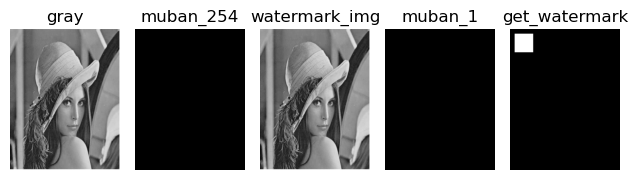

In [41]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

gray = cv.imread("lena.jpg", 0)
row, col = gray.shape

# 生成水印
water_mark = np.zeros((row, col), dtype=np.uint8)
water_mark[20:100, 20:100] = 255
mask = water_mark[:, :] > 0
# 将水印掩模区域变为1
water_mark[mask] = 1

# 加数字水印
# 模板muban_254是单通道，值全为254，转化为二进制时其高7位均为1，最低位为0。
muban_254 = np.ones((row, col), dtype=np.uint8) * 254
# 将灰度图的最低位变为0
gray_0 = cv.bitwise_and(gray, muban_254)
# 或操作将水印加到gray_0
watermark_img = cv.bitwise_or(gray_0, water_mark)

# 取出数字水印
# muban_1是取出水印的模板
muban_1 = np.ones((row, col), dtype=np.uint8)
# 与操作取出加入到灰度图中的水印
get_watermark = cv.bitwise_and(watermark_img, muban_1)
# 将水印中大于0的变为255，方便显示观察。
mask1 = get_watermark[:, :] > 0
get_watermark[mask1] = 255

plt.subplot(1, 5, 1), plt.title("gray"), plt.axis("off")
plt.imshow(gray, cmap="gray")
plt.subplot(1, 5, 2), plt.title("muban_254"), plt.axis("off")
plt.imshow(muban_254, cmap="gray")
plt.subplot(1, 5, 3), plt.title("watermark_img"), plt.axis("off")
plt.imshow(watermark_img, cmap="gray")
plt.subplot(1, 5, 4), plt.title("muban_1"), plt.axis("off")
plt.imshow(muban_1, cmap="gray")
plt.subplot(1, 5, 5), plt.title("get_watermark"), plt.axis("off")
plt.imshow(get_watermark, cmap="gray")
# 自动调整图片之间的距离
plt.tight_layout()
plt.show()

### （3）借助傅里叶变换实现高低通滤波

#### 3.1 numpy实现傅里叶变换

图像处理一般分为空间域处理和频率域处理。
在频率域对图像进行处理，最后再通过反变换将图像从频率域变换到空间域。
傅里叶指出，任何周期函数都可以表示为不同频率的正弦函数和的形式。
傅里叶变换后得到的频域值是复数，显示其结果需要使用实数图像加虚数图像，或幅度加相位图。
低频信息对应变化缓慢的灰度分量，高频则是剧烈变化的分量。

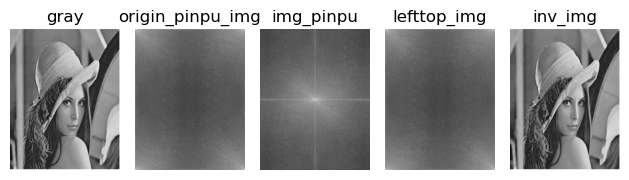

In [42]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

gray = cv.imread("lena.jpg", 0)

# 傅里叶变换。
# 使用numpy.fft.fft2(img)实现傅里叶变换

# 得到频谱信息，是一个复数数组。
origin_pinpu = np.fft.fft2(gray)
# 原始频谱图转化到[0,255]灰度空间以显示。
origin_pinpu_img = 20 * np.log(np.abs(origin_pinpu))

# 此时图像频谱中的零频率分量位于频谱图像（频域图像）的左上角，
# 使用numpy.fft.fftshift()函数将零频率成分移动到频域图像的中心位置，便于观察。
shift_origin_pinpu = np.fft.fftshift(origin_pinpu)

# 零频率成分移到中心点后，仍然是复数数组，要显示图像，需要调整到[0,255]的灰度空间内，
# 使用的公式为：像素新值=20*numpy.log(numpy.abs(频谱值))
img_pinpu = 20 * np.log(np.abs(shift_origin_pinpu))

# 逆傅里叶变换。频域转空域。
# 如果移动了频谱中心，则要移回左上角再使用逆变换。

# 将频谱中心移回左上角,结果仍然是复数数组。
shift_lefttop = np.fft.ifftshift(shift_origin_pinpu)

# 转换为[0,255]灰度空间，以显示查看。
lefttop_img = 20 * np.log(np.abs(shift_lefttop))
inv_ft = np.fft.ifft2(shift_lefttop)  # 使用逆变换，返回值是一个复数数组。
inv_img = np.abs(inv_ft)  # 将空域复数数组调整到[0,255]的灰度空间内，才能显示。

plt.subplot(1, 5, 1), plt.title("gray"), plt.axis("off")
plt.imshow(gray, cmap="gray")
plt.subplot(1, 5, 2), plt.title("origin_pinpu_img"), plt.axis("off")
plt.imshow(origin_pinpu_img, cmap="gray")
plt.subplot(1, 5, 3), plt.title("img_pinpu"), plt.axis("off")
plt.imshow(img_pinpu, cmap="gray")
plt.subplot(1, 5, 4), plt.title("lefttop_img"), plt.axis("off")
plt.imshow(lefttop_img, cmap="gray")
plt.subplot(1, 5, 5), plt.title("inv_img"), plt.axis("off")
plt.imshow(inv_img, cmap="gray")
# 自动调整图片之间的距离
plt.tight_layout()
plt.show()

#### 3.2 高、低通滤波

可以对傅里叶变换得到的频域信号进行处理，如高通或低通滤波，然后逆傅里叶变换回空域，
可以实现图像增强、图像去噪、边缘检测、特征提取、压缩和加密等操作。
比如得到频谱图并将零频率成分移到中心点，并且转换为[0,255]的灰度空间之后，也可以不转换。
就可以像操作图像一样将其中心附近位置像素的值置为0，表示过滤掉低频信息，
再将零频率分量移动到左上角，接着执行逆傅里叶变换之后得到空域复数数组，
最后转换到[0,255]灰度空间显示即可，可观察到低频信号被过滤，只保留了高频的边缘等信息。

C:\Users\世兰丁\AppData\Local\Temp\ipykernel_16564\607981889.py:16: RuntimeWarning: divide by zero encountered in log
  inv_shift_img = 20 * np.log(np.abs(inv_shift))  # 可显示图


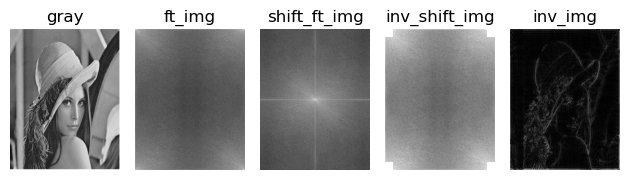

In [44]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

gray = cv.imread("lena.jpg", 0)  # 灰度图
row, col = gray.shape  # 得到行和列
ft = np.fft.fft2(gray)  # 傅里叶变换
ft_img = 20 * np.log(np.abs(ft))  # 转换为可显示图
shift_ft = np.fft.fftshift(ft)  # 零频谱成分移到中心
shift_ft_img = 20 * np.log(np.abs(shift_ft))  # 可显示图
crow, ccol = int(row / 2), int(col / 2)  # 图像中心点的坐标

# 将该区域置零，即过滤低频信息，保留高频信息，如边缘。
shift_ft[crow - 30 : crow + 30, ccol - 30 : ccol + 30] = 0
inv_shift = np.fft.ifftshift(shift_ft)  # 零频谱成分移到左上角
inv_shift_img = 20 * np.log(np.abs(inv_shift))  # 可显示图
inv_img = np.fft.ifft2(inv_shift)  # 进行逆傅里叶变换
inv_img = np.abs(inv_img)  # 转换为[0,255]灰度空间内的值。

plt.subplot(1, 5, 1), plt.title("gray"), plt.axis("off")
plt.imshow(gray, cmap="gray")
plt.subplot(1, 5, 2), plt.title("ft_img"), plt.axis("off")
plt.imshow(ft_img, cmap="gray")
plt.subplot(1, 5, 3), plt.title("shift_ft_img"), plt.axis("off")
plt.imshow(shift_ft_img, cmap="gray")
plt.subplot(1, 5, 4), plt.title("inv_shift_img"), plt.axis("off")
plt.imshow(inv_shift_img, cmap="gray")
plt.subplot(1, 5, 5), plt.title("inv_img"), plt.axis("off")
plt.imshow(inv_img, cmap="gray")

# 自动调整图片之间的距离
plt.tight_layout()
plt.show()

#### 3.3 OpenCV实现傅里叶变换

OpenCV提供了函数cv2.dft()和cv2.idft()来实现傅里叶变换和逆傅里叶变换，
cv2.dft(img,转换标识)，要使用np.float32()函数将img转换成np.float32格式，
转换标识的值通常为cv2.DFT_COMPLEX_OUTPUT，用来输出一个复数阵列。

cv2.dft()函数返回结果和用numpy的一致，只是分为了实数和虚数两个通道。
将零频率分量移到中心的函数仍然使用np.fft.fftshift()，
要显示还要进一步处理，cv2.magnitude(实部，虚部)可以计算频谱信息的幅度，该函数返回两者平方和的平方根。
为将频谱幅度的信息以图像显示，需要将幅度值映射到灰度图像的灰度空间[0,255]内，使用公式result = 20*np.log(cv2.magnitude(实部，虚部))

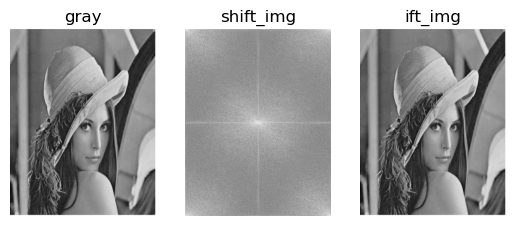

In [45]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread("lena.jpg", 0)

# 傅里叶变换
# 傅里叶变换，图像要转为np.float32格式。
ft = cv.dft(np.float32(img), flags=cv.DFT_COMPLEX_OUTPUT)

# 使用numpy的函数将零频率分量移到中心。
shift_ft = np.fft.fftshift(ft)

# ft是双通道，储存实部和虚部
shift_img = 20 * np.log(cv.magnitude(shift_ft[:, :, 0], ft[:, :, 1]))

# 逆傅里叶变换
# 如果零频率分量移到中心，需要移回左上角。
lefttop_ft = np.fft.ifftshift(shift_ft)

# 逆傅里叶变换，输出是复数，仍然是双通道（实部和虚部）。
ift = cv.idft(lefttop_ft)
ift_img = cv.magnitude(ift[:, :, 0], ift[:, :, 1])  # 得到图像。

plt.subplot(1, 3, 1), plt.title("gray"), plt.axis("off")
plt.imshow(gray, cmap="gray")
plt.subplot(1, 3, 2), plt.title("shift_img"), plt.axis("off")
plt.imshow(shift_img, cmap="gray")
plt.subplot(1, 3, 3), plt.title("ift_img"), plt.axis("off")
plt.imshow(ift_img, cmap="gray")
plt.show()

### （4）几何变换

缩放、翻转、透视、重映射等

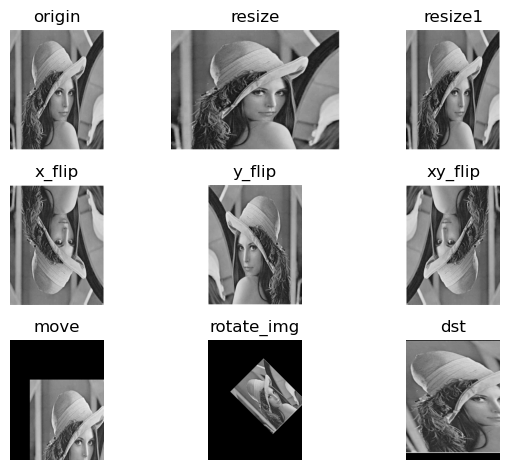

In [47]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread("lena.jpg", 0)

# 缩放
row, col = img.shape
size = (int(col * 0.9), int(row * 0.5))
resize_img = cv.resize(img, size)  # 设定缩放尺寸之后再使用函数
resize1_img = cv.resize(img, None, fx=0.5, fy=0.5)  # 直接设定x，y方向缩放因子。

# 翻转,cv2.flip(img,flipcode)，flipcode是0表绕x轴翻转，正整数表示绕y，负整数绕x，y同时。
x_flip = cv.flip(img, 0)  # 绕x翻转
y_flip = cv.flip(img, 1)  # 绕y翻转
xy_flip = cv.flip(img, -2)  # 绕x，y同时翻转

# 仿射变换，保持平直性和平行性。包括平移、旋转等。
# 实现函数是cv2.warpAffine(原图，变换矩阵，输出尺寸，插值方法)
height, width = img.shape[:2]
x = 100
y = 200
M = np.float32([[1, 0, x], [0, 1, y]])  # 变换矩阵
move = cv.warpAffine(img, M, (width, height))  # 实现移动效果

# 使用cv.warpAffine（）实现旋转时，
# 变换矩阵可由cv2.getRotationMatrix2D(旋转点(x,y)，角度，缩放尺寸)获取。
rotate_M = cv.getRotationMatrix2D((height / 2, width / 2), 45, 0.5)
rotate_img = cv.warpAffine(img, rotate_M, (width, height))

# 透视。仿射变换可以将矩形映射为任意平行四边形，透视变换则可以将矩形映射为任意四边形。
# 通过cv2.warpPerspective()实现，
pts1 = np.float32([[150, 50], [400, 50], [60, 450], [310, 450]])  # 原始图像中的4个顶点
pts2 = np.float32(
    [[50, 50], [row - 50, 50], [50, col - 50], [row - 50, col - 50]]
)  # 目标图像中的4个顶点
M = cv.getPerspectiveTransform(pts1, pts2)  # 获取变换矩阵。
dst = cv.warpPerspective(img, M, (col, row))  # 透视图

plt.subplot(3, 3, 1), plt.title("origin"), plt.axis("off")
plt.imshow(img, cmap="gray")
plt.subplot(3, 3, 2), plt.title("resize"), plt.axis("off")
plt.imshow(resize_img, cmap="gray")
plt.subplot(3, 3, 3), plt.title("resize1"), plt.axis("off")
plt.imshow(resize1_img, cmap="gray")
plt.subplot(3, 3, 4), plt.title("x_flip"), plt.axis("off")
plt.imshow(x_flip, cmap="gray")
plt.subplot(3, 3, 5), plt.title("y_flip"), plt.axis("off")
plt.imshow(y_flip, cmap="gray")
plt.subplot(3, 3, 6), plt.title("xy_flip"), plt.axis("off")
plt.imshow(xy_flip, cmap="gray")
plt.subplot(3, 3, 7), plt.title("move"), plt.axis("off")
plt.imshow(move, cmap="gray")
plt.subplot(3, 3, 8), plt.title("rotate_img"), plt.axis("off")
plt.imshow(rotate_img, cmap="gray")
plt.subplot(3, 3, 9), plt.title("dst"), plt.axis("off")
plt.imshow(dst, cmap="gray")

# 自动调整图片之间的距离
plt.tight_layout()
plt.show()

In [49]:
# 重映射。把一幅图像内的像素点放置到另外一幅图像内的指定位置，这个过程称为重映射。
# 下面将目标数组内的所有像素点都映射为原始图像内第0行第3列上的像素点，
matrix = np.random.randint(0, 256, size=[4, 5], dtype=np.uint8)
rows, cols = matrix.shape
mapx = np.ones(matrix.shape, np.float32) * 3
mapy = np.ones(matrix.shape, np.float32) * 0
rst = cv.remap(matrix, mapx, mapy, cv.INTER_LINEAR)
print("matrix:\n", matrix)
print("mapx:\n", mapx)
print("mapy:\n", mapy)
print("rst:\n", rst)

matrix:
 [[117 179  74  52  96]
 [ 31  95   2 236 165]
 [230 165 200  53 217]
 [ 51 112  18 110  81]]
mapx:
 [[3. 3. 3. 3. 3.]
 [3. 3. 3. 3. 3.]
 [3. 3. 3. 3. 3.]
 [3. 3. 3. 3. 3.]]
mapy:
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
rst:
 [[52 52 52 52 52]
 [52 52 52 52 52]
 [52 52 52 52 52]
 [52 52 52 52 52]]


### （5）直方图

直方图。统计图像内各个灰度级出现的次数。

直方图均衡化：
如果一幅图像拥有全部可能的灰度级，并且像素值的灰度均匀分布，
那么这幅图像就具有高对比度和多变的灰度色调，灰度级丰富且覆盖范围较大。
在外观上，这样的图像具有更丰富的色彩，不会过暗或过亮。

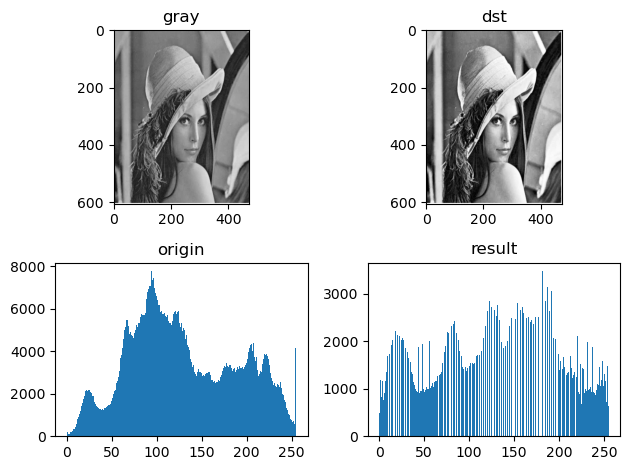

In [52]:
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread("lena.jpg")
gray_img = cv.imread("lena.jpg", 0)
# cv2.calcHist计算统计B、G、R通道的直方图信息。
hist_b = cv.calcHist([img], [0], None, [256], [0, 255])
hist_g = cv.calcHist([img], [1], None, [256], [0, 255])
hist_r = cv.calcHist([img], [2], None, [256], [0, 255])

# 直方图均衡化
# 如果一幅图像拥有全部可能的灰度级，并且像素值的灰度均匀分布，
# 那么这幅图像就具有高对比度和多变的灰度色调，灰度级丰富且覆盖范围较大。
# 在外观上，这样的图像具有更丰富的色彩，不会过暗或过亮。
# dst = cv2.equalizeHist(src)，输入是单通道。
dst = cv.equalizeHist(gray_img)

# plt.imshow函数显示图片时默认是按RGB通道排列。
plt.subplot(2, 2, 1), plt.imshow(gray_img, cmap="gray"), plt.title("gray")
plt.subplot(2, 2, 2), plt.imshow(dst, cmap="gray"), plt.title("dst")
plt.subplot(2, 2, 3), plt.hist(img.ravel(), 256)  # ravel转为一维数据
plt.title("origin")
plt.subplot(2, 2, 4), plt.hist(dst.ravel(), 256)
plt.title("result")

plt.tight_layout()
plt.show()  # 显示窗口

### （6）hough变换

霍夫变换是一种在图像中寻找直线、圆形以及其他简单形状的方法。
在笛卡儿空间内，任意两个点（x0, y0）、（x1,y1），连接为直线y=k1x+b1，
其截距和斜率是(k1,b1)，该直线在霍夫空间内映射为点(k1,b1)。
笛卡儿空间内的两个点确定的直线y=k1x+b1，那么这两个点会映射为霍夫空间内两条相交于(k1,b1)的直线。

结论：如果在笛卡儿空间内，有N个点能够连成一条直线y=k1x+b1，那么在霍夫空间内就会有N条直线穿过对应的点(k1, b1)。
或者反过来说，如果在霍夫空间中，有越多的直线穿过点(k1, b1)，就说明在笛卡儿空间内有越多的点位于斜率为k1，截距为b1的直线y=k1x+b1上。

综上所述，在霍夫空间内，经过一个点的直线越多，说明其在笛卡儿空间内映射的直线，是由越多的点所构成（穿过）的。
因此，在计算中，我们希望用更多的点构造一条直线，以提高直线的可靠性。
也就是说，如果一条直线是由越多点所构成的，那么它实际存在的可能性就越大，它的可靠性也就越高。

极坐标和霍夫空间之间的映射规则也差不多。
通常情况下，设置一个阈值，当霍夫坐标系内交于某点的曲线达到了阈值，就认为在对应的极坐标系内存在（检测到）一条直线。


#### 6.1 hough直线检测

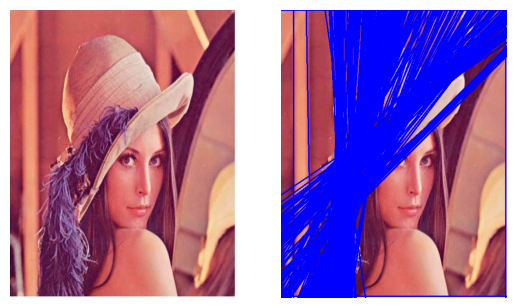

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# hough直线检测，函数lines=cv2.HoughLines(image, rho, theta, threshold)
# lines是由numpy.ndarray类型的元素构成的，其中每个元素都是一对浮点数，
# 表示检测到的直线的参数，即( r, θ)。

# rho为以像素为单位的距离r的精度，一般是1；
# theta为角度θ的精度，一般是π/180，表示要搜索所有可能的角度；
# threshold是阈值，该值越小，判定出的直线就越多。

img = cv.imread("lena.jpg")
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
binary_img = cv.Canny(gray_img, 50, 150, apertureSize=3)  # 直线检测要用二值图。
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)  # bgr转rgb
show = rgb.copy()  # 复制rgb
lines = cv.HoughLines(binary_img, 1, np.pi / 180, 140)  # 搜索线段
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * a)
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * a)
    cv.line(rgb, (x1, y1), (x2, y2), (0, 0, 255), 2)

plt.subplot(1, 2, 1), plt.imshow(show), plt.axis("off")
plt.subplot(1, 2, 2), plt.imshow(rgb), plt.axis("off")
plt.show()

#### 6.2 概率hough变换

简单hough直线检测多数时候存在非常严重的误检测，为了解决上述问题，人们提出了霍夫变换的改进版——概率霍夫变换。

lines = cv2.HoughLinesP(image, rho, theta, threshold, minLineLength, maxLineGap)
lines返回一对浮点数( r, θ)；minLineLength用来控制“接受直线的最小长度”的值，默认值为0；
maxLineGap用来控制接受共线线段之间的最小间隔，即在一条线中两点的最大间隔。
如果两点间的间隔超过了参数maxLineGap的值，就认为这两点不在一条线上。默认值为0。


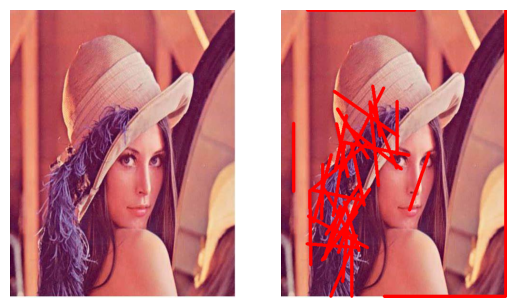

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread("lena.jpg", -1)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray, 50, 150, apertureSize=3)
orgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
oShow = orgb.copy()
lines = cv.HoughLinesP(edges, 1, np.pi / 180, 1, minLineLength=100, maxLineGap=10)
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv.line(orgb, (x1, y1), (x2, y2), (255, 0, 0), 5)

plt.subplot(121), plt.imshow(oShow), plt.axis("off")
plt.subplot(122), plt.imshow(orgb), plt.axis("off")
plt.show()

### （7）图像梯度

即图像变化的速度，边缘灰度变化大，梯度大，平滑的部分灰度变化小，梯度小。

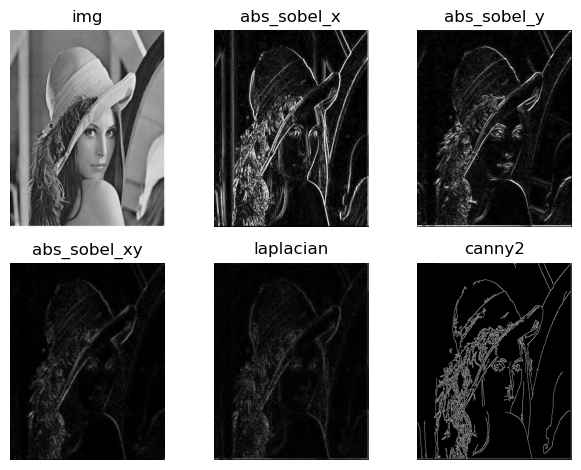

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt

# sobel算子。求水平方向梯度的滤波器为[[-1,0,1],[-2,0,2],[-1,0,1]]，
# 求垂直方向梯度的滤波器为[[-1,-2,-1],[0,0,0],[1,2,1]]
# dst = cv2.Sobel(src, ddepth, dx, dy[, ksize[, scale[, delta[, borderType]]]] )
# dx代表水平方向的求导阶数，一般是0,1,2。

img = cv.imread("lena.jpg", 0)
sobel_x = cv.Sobel(img, cv.CV_64F, 1, 0)  # 得到水平方向的梯度
sobel_y = cv.Sobel(img, cv.CV_64F, 0, 1)  # 垂直方向的梯度
sobel_xy = cv.Sobel(img, cv.CV_64F, 1, 1)  # 水平和垂直方向的梯度

# 将两个梯度转换为绝对值，不然水平方向的左右两边只能显示其中一边，垂直方向也一样。
abs_sobel_x = cv.convertScaleAbs(sobel_x)
abs_sobel_y = cv.convertScaleAbs(sobel_y)
abs_sobel_xy = cv.convertScaleAbs(sobel_xy)

# 水平和垂直梯度按一定权重相加,和直接求的abs_sobel_xy对比。
sobel_xy1 = cv.addWeighted(abs_sobel_x, 0.5, abs_sobel_y, 0.5, 0)

# Scharr算子。和sobel相似，核不同，且dx和dy不能同时设为0和1。
# Sobel算子的缺点是，当其核结构较小时，精确度不高，而Scharr算子具有更高的精度。

# Laplacian算子。一种二阶导数算子，具有旋转不变性，
# 可以满足不同方向的图像边缘锐化（边缘检测）的要求。
# 通常情况下，其算子的系数之和需要为零。比如[[0,1,0],[1,-4,1],[0,1,0]]
# dst = cv2.Laplacian(src, ddepth[, ksize[, scale[, delta[, borderType]]]] )
laplacian = cv.Laplacian(img, cv.CV_64F)
laplacian = cv.convertScaleAbs(laplacian)

# canny检测。
# 步骤是去噪（高斯滤波）、计算梯度的幅度和方向、非极大值抑制（使边缘变细）、确定边缘。
# canny = cv.Canny(image, threshold1, threshold2[, apertureSize[, L2gradient]])
canny1 = cv.Canny(img, 120, 200)
canny2 = cv.Canny(img, 50, 250)

plt.subplot(2, 3, 1), plt.title("img"), plt.axis("off")
plt.imshow(img, cmap="gray")
plt.subplot(2, 3, 2), plt.title("abs_sobel_x"), plt.axis("off")
plt.imshow(abs_sobel_x, cmap="gray")
plt.subplot(2, 3, 3), plt.title("abs_sobel_y"), plt.axis("off")
plt.imshow(abs_sobel_y, cmap="gray")
plt.subplot(2, 3, 4), plt.title("abs_sobel_xy"), plt.axis("off")
plt.imshow(abs_sobel_xy, cmap="gray")
plt.subplot(2, 3, 5), plt.title("laplacian"), plt.axis("off")
plt.imshow(laplacian, cmap="gray")
plt.subplot(2, 3, 6), plt.title("canny2"), plt.axis("off")
plt.imshow(canny2, cmap="gray")

plt.tight_layout()
plt.show()

### （8）图像金字塔

图像金字塔。每次降采样图像的宽和高都变为原来的二分之一。

图像金字塔是由一幅图像的多个不同分辨率的子图所构成的图像集合。
该组图像是由单个图像通过不断地降采样所产生的，最小的图像可能仅仅有一个像素点。
而上采样要补充大量像素值，需要插值，比如最近邻插值，或者在要插值点的右侧和下方插入值为0的列和行。
下采样会丢失像素值，和上采样并不可逆。

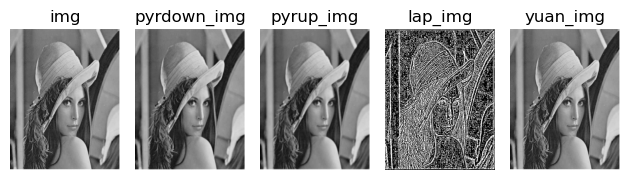

In [4]:
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread("lena.jpg", 0)
pyrdown_img = cv.pyrDown(img)
pyrup_img = cv.pyrUp(pyrdown_img)

# 拉普拉斯金字塔。
# 为了上采样时能恢复具有较高分辨率的原始图像，
# 就要获取在下采样过程中所丢失的信息，这些丢失的信息就构成了拉普拉斯金字塔。
# 步骤是将图像先进行一次下采样，
# 然后进行一次上采样恢复到和原图一样大，再用原图减去上采样得到的图。
lap_img = img - pyrup_img
yuan_img = lap_img + pyrup_img  # 使用laplacian图像恢复原高分辨率图。

plt.subplot(1, 5, 1), plt.title("img"), plt.axis("off")
plt.imshow(img, cmap="gray")
plt.subplot(1, 5, 2), plt.title("pyrdown_img"), plt.axis("off")
plt.imshow(pyrdown_img, cmap="gray")
plt.subplot(1, 5, 3), plt.title("pyrup_img"), plt.axis("off")
plt.imshow(pyrup_img, cmap="gray")
plt.subplot(1, 5, 4), plt.title("lap_img"), plt.axis("off")
plt.imshow(lap_img, cmap="gray")
plt.subplot(1, 5, 5), plt.title("yuan_img"), plt.axis("off")
plt.imshow(yuan_img, cmap="gray")

plt.tight_layout()
plt.show()